# FIR Delay Effect


## Importing Libraries


In [255]:
##Scipy functions
import scipy.io.wavfile as wv
from scipy.ndimage import shift
from IPython.display import Audio

##Others
import numpy as np
import os
import matplotlib.pyplot as plt

# Main


## Import .wav file as signal


In [256]:
DATA_FOLDER_PATH = "../Data" #Specify Data folder directory here
FILENAME = "string_1.wav" #Specify file name here


filepath = os.path.join(DATA_FOLDER_PATH, FILENAME)

In [257]:
sampleFreq, audio = wv.read(filepath) #reading audio signal here

In [258]:
##Test

sampleFreq = 1000  # Sampling frequency (Hz)
t = np.linspace(0, 1, sampleFreq, endpoint=False)  # Time vector (1 second duration)
audio = np.sin(2 * np.pi * 5 * t)  # 5 Hz sine wave

In [259]:
sampleLen = len(audio)/sampleFreq
print(f"Sound is {sampleLen}s long")

Sound is 1.0s long


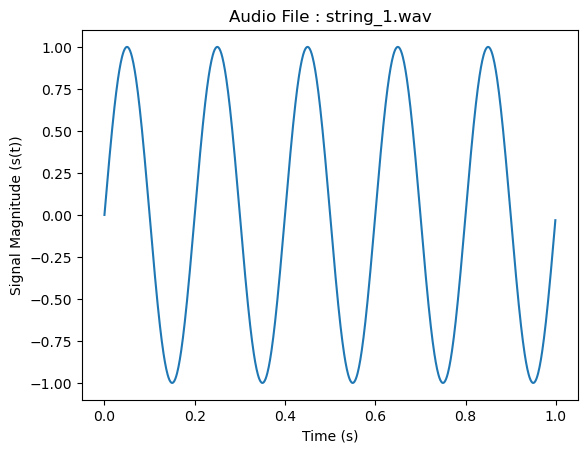

In [260]:
timeX = np.arange(0, sampleLen, 1/sampleFreq)

plt.plot(timeX, audio)
plt.xlabel("Time (s)")
plt.ylabel("Signal Magnitude (s(t))")
plt.title(f"Audio File : {FILENAME}")

plt.show()

In [261]:
Audio(audio, rate=sampleFreq)

## FIR Filter


In [262]:
attenuationFactor = 0.8
timeDelay = len(audio) / 7

In [263]:
FIRDelayedAudio = audio + attenuationFactor * shift(audio, timeDelay)

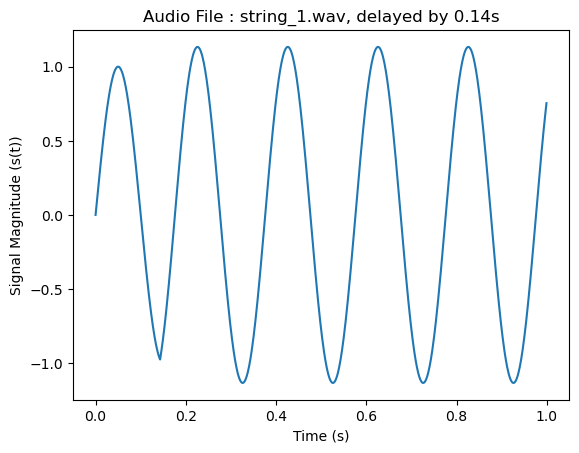

In [264]:
plt.plot(timeX, FIRDelayedAudio)
plt.xlabel("Time (s)")
plt.ylabel("Signal Magnitude (s(t))")
plt.title(f"Audio File : {FILENAME}, delayed by {timeDelay / sampleFreq:.2f}s")

plt.show()

In [265]:
Audio(FIRDelayedAudio, rate=sampleFreq)

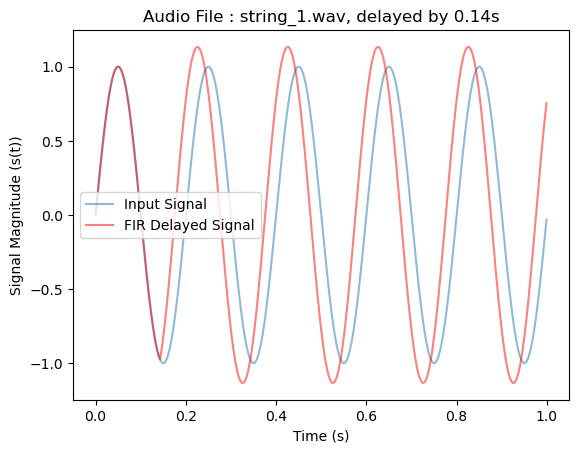

In [266]:
## Display both signal simultaneously
plt.plot(timeX, audio, alpha=.5, label ='Input Signal')
plt.plot(timeX, FIRDelayedAudio, alpha=.5, c='red', label='FIR Delayed Signal')

plt.xlabel("Time (s)")
plt.ylabel("Signal Magnitude (s(t))")
plt.title(f"Audio File : {FILENAME}, delayed by {timeDelay / sampleFreq:.2f}s")
plt.legend()

plt.show()

### Impulse Response


In [267]:
impulseSignal = np.zeros(len(audio))
impulseSignal[0] = 1

In [268]:
## Calculate the filtered impulseSignal



## IIR Filter


In [269]:
scalingFactor = 1.2
attenuationFactor = 0.8
timeDelay = len(audio) / 20

In [270]:
IIRDelayedAudio = scalingFactor * audio
IIRDelayedAudio += attenuationFactor * shift(IIRDelayedAudio, timeDelay)

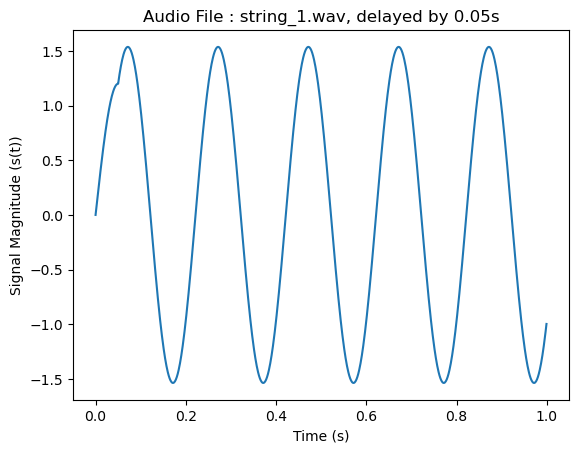

In [271]:
plt.plot(timeX, IIRDelayedAudio)
plt.xlabel("Time (s)")
plt.ylabel("Signal Magnitude (s(t))")
plt.title(f"Audio File : {FILENAME}, delayed by {timeDelay / sampleFreq:.2f}s")

plt.show()

In [272]:
Audio(IIRDelayedAudio, rate=sampleFreq)